In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import time
import pydotplus
import graphviz

from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import tree
from IPython.display import Image

sns.set(style='whitegrid',palette='mako')


%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

## So here's what you should do. Pick a dataset. It could be one you've worked with before or it could be a new one. Then build the best decision tree you can. Now try to match that with the simplest random forest you can (3.2.6)

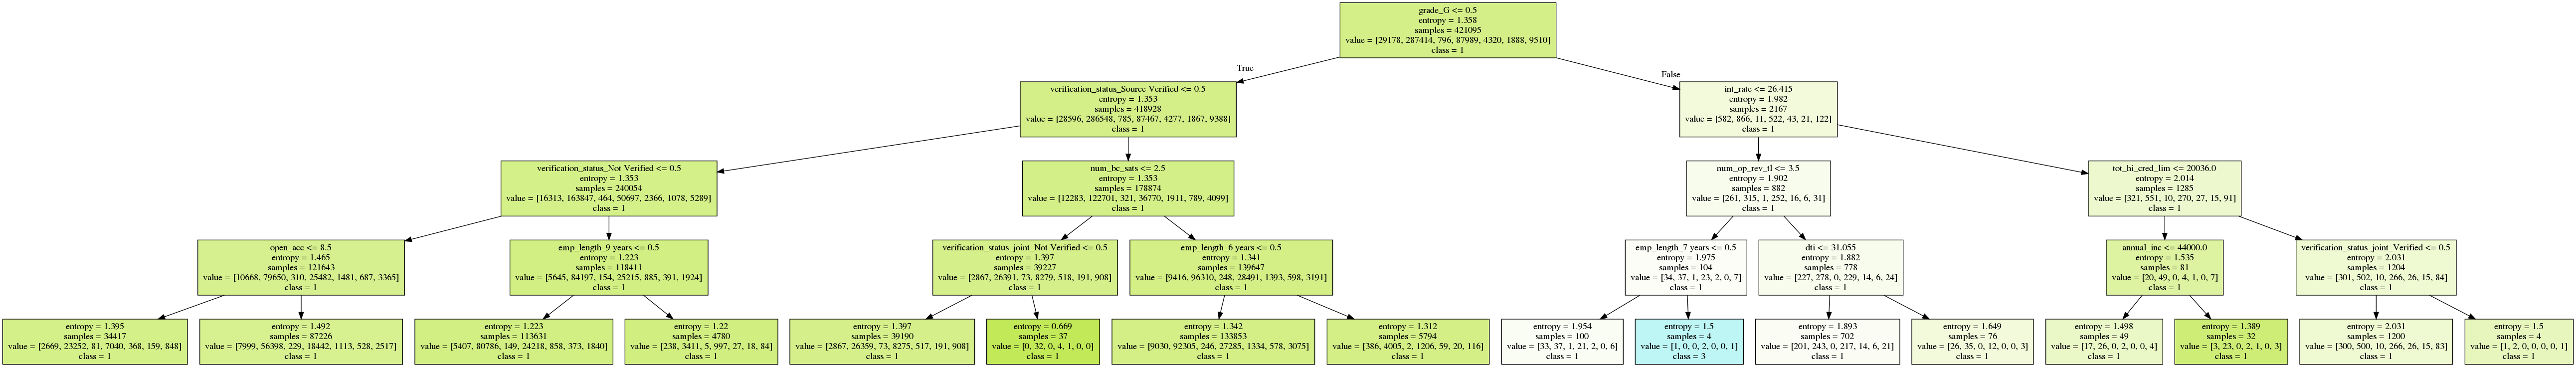

In [215]:
#Create a decision tree
start = time.time()
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
)
decision_tree.fit(X, Y)

# Render our tree. 
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['0','1','2','3','4','5','6','7'],
            
    filled=True
)
stop = time.time()
times = (stop-start)/60
graph = pydotplus.graph_from_dot_data(dot_data)#only for the first example
Image(graph.create_png())

In [216]:
#Use cross validation to measure accuracy
score_dt = cross_val_score(decision_tree,X,Y,cv=10)
print(score_dt)

[0.68252951 0.68628149 0.7302605  0.68290945 0.68252197 0.68252197
 0.68253817 0.76738939 0.69788871 0.68992543]


In [1]:
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), decision_tree.feature_importances_), 
               X.columns), reverse=True))
feature_sigs.head(10)

NameError: name 'pd' is not defined

In [244]:
scores =[]
features = []
depths = []
times1 = []
for i in range(1,20):
    for j in range(1,10):
        start = time.time()
        decision_tree = tree.DecisionTreeClassifier(
            criterion='entropy',
            max_features=j,
            max_depth=i)
        decision_tree.fit(X, Y)
        score_dt = cross_val_score(decision_tree,X,Y,cv=10)
        scores.append(score_dt.mean())
        stop = time.time()
        times = (stop-start)/60
        features.append(j)
        depths.append(i)
        times1.append(times)


In [293]:
plotdf= pd.DataFrame()
plotdf['scores'] = scores
plotdf['features'] = features
plotdf['depths'] = depths
times = [round(x,4) for x in times1]
plotdf['times'] = times

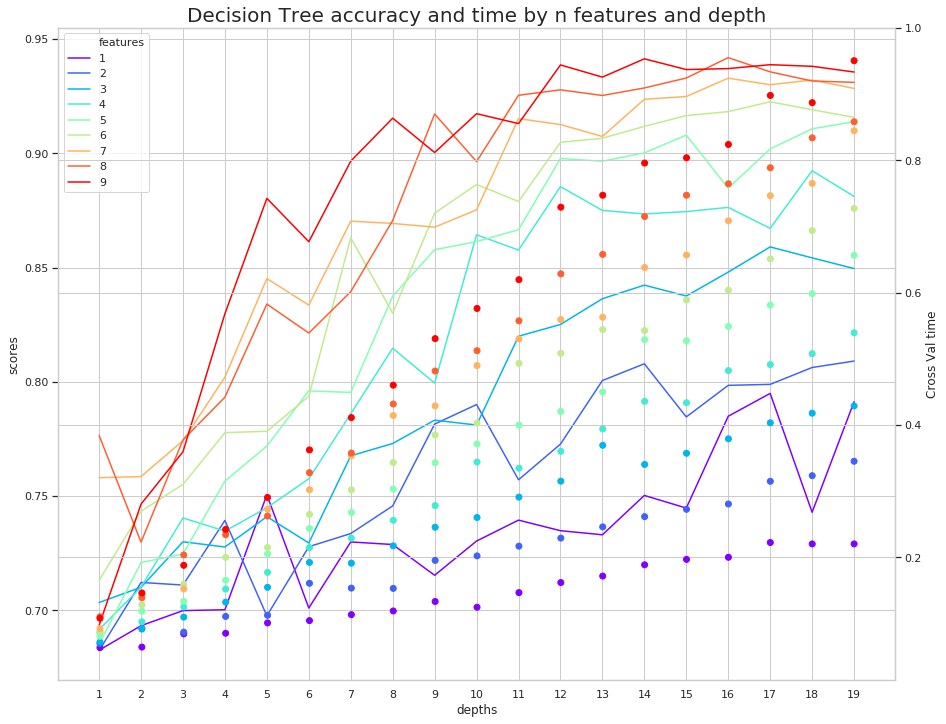

In [326]:

fig, ax = fig, ax = plt.subplots(figsize=(15,12))

ax2 = ax.twinx()
ax = sns.lineplot(x='depths', y='scores', hue='features', data=plotdf,
                  palette='rainbow', legend='full', ax=ax)
ax2 =plt.scatter(plotdf['depths'],plotdf['times'],c=plotdf['features'],label='time',cmap='rainbow')
plt.xticks(range(0, 20, 1))
plt.ylabel('Cross Val time')
plt.xlabel('Depth')
plt.title('Decision Tree accuracy and time by n features and depth',fontsize=20)
plt.show()


The above visualization shows the accuracy by depth for each number of features ('scores';lines and color).
the dots represent the cross validation time by depth and feature number ('crossvaltime';dots and colors.
From this visualization, it is easy to how you sacrifice accuracy for computational efficiency. Ofcourse, my times are the duration of the fitting and cross validation at cv=10, as simplicity is lost,duration increases.

## So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation. (3.2.5)

In [196]:
#get data
y2015 = pd.read_csv('loanstats.csv', skipinitialspace=True, header=1)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.



In [79]:
#Using prior knowledge and a bit of assumption in which variables could be significant

In [197]:
#selected raw features
y2015 = y2015[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
 'loan_status',  'dti', 'delinq_2yrs', 'inq_last_6mths',
 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
 'total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
 'inq_last_12m', 'acc_open_past_24mths',  'chargeoff_within_12_mths', 'delinq_amnt',
 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
 'mort_acc', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',  'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
 'num_rev_accts', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim',
 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']]

In [198]:
y2015 = y2015[:-2] #drop summary rows
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')
y2015.shape

(421095, 75)

In [82]:
#run the model on the raw selection of the data

rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier

X = y2015.drop('loan_status',1) #data
Y = y2015['loan_status'] #target
X = pd.get_dummies(X) #add dummies for categorical variables
X = X.dropna(axis=1)
start = time.time() #start time
score_rfc = cross_val_score(rfc,X,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.95860939 0.96172022 0.9611028  0.9603904  0.96019948 0.96038946
 0.96036477 0.95993731 0.9598879  0.9598632 ] 3.6506215850512187 0.9602464915597126


Not surprising it performed well with all of these data points.

In [83]:
#fit the model for feature significance metric print most significant in descending order
rfc.fit(X,Y)
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), X.columns), 
             reverse=True))

[(0.4064, 'out_prncp'), (0.1815, 'total_rec_prncp'), (0.0986, 'total_pymnt'), (0.0448, 'total_rec_int'), (0.0375, 'installment'), (0.0339, 'loan_amnt'), (0.0302, 'recoveries'), (0.0113, 'int_rate'), (0.0092, 'revol_bal'), (0.0067, 'dti'), (0.0064, 'annual_inc'), (0.0063, 'total_rev_hi_lim'), (0.0063, 'total_bc_limit'), (0.0061, 'tot_cur_bal'), (0.0061, 'mo_sin_old_rev_tl_op'), (0.006, 'tot_hi_cred_lim'), (0.006, 'term_ 36 months'), (0.0057, 'total_bal_ex_mort'), (0.0052, 'total_il_high_credit_limit'), (0.0049, 'total_acc'), (0.0048, 'total_rec_late_fee'), (0.0048, 'mo_sin_rcnt_rev_tl_op'), (0.0046, 'acc_open_past_24mths'), (0.0044, 'num_il_tl'), (0.0042, 'num_bc_tl'), (0.004, 'mo_sin_rcnt_tl'), (0.0038, 'num_sats'), (0.0038, 'num_op_rev_tl'), (0.0036, 'open_acc'), (0.0035, 'pct_tl_nvr_dlq'), (0.0035, 'num_bc_sats'), (0.0031, 'num_tl_op_past_12m'), (0.0028, 'term_ 60 months'), (0.0024, 'mort_acc'), (0.002, 'inq_last_6mths'), (0.0019, 'tot_coll_amt'), (0.0017, 'num_accts_ever_120_pd'), (

According to this information, alot of features can be dropped. it looks like if out_prncp was dropped this model would be able to reach 80%. If total_payment was dropped looks like it may get to 90%

In [84]:
#Drop features with 0 scores
X = X.drop(['home_ownership_ANY','verification_status_joint_Not Verified',
           'verification_status_joint_Source Verified','verification_status_joint_Verified',
           'num_tl_30dpd','acc_now_delinq', 'delinq_amnt','chargeoff_within_12_mths','grade_G'],axis=1)

In [85]:
#Run the model again with less features
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,X,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.95792073 0.96191019 0.96155399 0.96062786 0.96043695 0.9604132
 0.96041226 0.96043601 0.96022039 0.95988695] 3.9782718777656556 0.9603818547719772


In [86]:
#fit the model for metrics
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
rfc.fit(X,Y)
#This time capture output into a dataframe for easier veiwing
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))


In [87]:
feature_sigs.rename(columns={0:'sig',1:'feature'},inplace=True)
feature_sigs.head()#raname from type int to str

sig          feature
0  0.4159        out_prncp
1  0.1620  total_rec_prncp
2  0.0911      total_pymnt
3  0.0492    total_rec_int
4  0.0427        loan_amnt

In [88]:
#Lets see the accuracy with the first 20 features
features_20 = feature_sigs.feature[0:20]
features = pd.DataFrame()
for i in features_20:
    features[i] = X[i]

In [89]:
rfc.fit(features,Y)#fit the model for metrics
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs.head()


0               1
0  0.4571       loan_amnt
1  0.1950        int_rate
2  0.0910     installment
3  0.0425      annual_inc
4  0.0395  inq_last_6mths

In [90]:
#Run the model again with features as the data
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.91368051 0.96863052 0.96473605 0.96112655 0.96036571 0.96050819
 0.96048351 0.96031727 0.96033914 0.96029069] 4.1080094337463375 0.9570478147882457


The model is still accurate to the defined threashold, but it is very slow. So slow that I have decided to time the operations. Data should continue to be dropped. Also the variance in the scores is increasing, the first test was at 91%.

In [91]:
#fit the model for metrics
rfc.fit(features,Y)
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs.head()


0               1
0  0.4989       loan_amnt
1  0.1662        int_rate
2  0.0636     installment
3  0.0462      annual_inc
4  0.0440  inq_last_6mths

In [92]:
#reduce again
feature_sigs.rename(columns={0:'sig',1:'feature'},inplace=True)
features_15 = feature_sigs.feature[0:15]
features = pd.DataFrame()
for i in features_15:
    features[i] = X[i]

In [93]:
#run the model again
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.93481513 0.96620835 0.96331125 0.96088908 0.96034196 0.9604132
 0.9605785  0.96031727 0.96038663 0.96007695] 2.2261264085769654 0.9587338331504487


In [94]:
#the result of the first validation is troubling, but the average is still above 90%
#lets drop even more
rfc.fit(features,Y)#fit the model for metrics
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs

0                1
0   0.5113        revol_bal
1   0.2353        out_prncp
2   0.0437    total_rec_int
3   0.0408        loan_amnt
4   0.0387  total_rec_prncp
5   0.0372      installment
6   0.0191         int_rate
7   0.0185   inq_last_6mths
8   0.0155       annual_inc
9   0.0127      total_pymnt
10  0.0108          pub_rec
11  0.0061        total_acc
12  0.0039              dti
13  0.0037      delinq_2yrs
14  0.0028         open_acc

In [ ]:
#lets keep 12, to include 'payment_amount'
feature_sigs.rename(columns={0:'sig',1:'feature'},inplace=True)
features_12 = feature_sigs.feature[0:12]
features = pd.DataFrame()
for i in features_12:
    features[i] = X[i]

In [96]:
#run the model again
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.8601553  0.97238251 0.96532972 0.96143525 0.95993826 0.95972453
 0.95882115 0.95965233 0.96019664 0.96052819] 2.6317194859186808 0.9518163901053889


In [97]:
rfc.fit(features,Y)#fit the model for metrics
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs

0               1
0   0.5110        int_rate
1   0.1820             dti
2   0.1146       revol_bal
3   0.0464      annual_inc
4   0.0418     installment
5   0.0360     delinq_2yrs
6   0.0180       loan_amnt
7   0.0157         pub_rec
8   0.0150  inq_last_6mths
9   0.0128       out_prncp
10  0.0040        open_acc
11  0.0028       total_acc

In [98]:
feature_sigs.rename(columns={0:'sig',1:'feature'},inplace=True)
features_ten = feature_sigs.feature[0:10]
features = pd.DataFrame()
for i in features_ten:
    features[i] = X[i]

In [99]:
#run the model again
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.87687303 0.88266724 0.88373584 0.8829047  0.88152458 0.88226075
 0.88028687 0.88102306 0.88151614 0.88023085] 2.448634950319926 0.8813023049178866


In [100]:
rfc.fit(features,Y)#fit the model for metrics
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs

0               1
0  0.6569       revol_bal
1  0.0647        int_rate
2  0.0641     installment
3  0.0512      annual_inc
4  0.0506             dti
5  0.0454       loan_amnt
6  0.0368  inq_last_6mths
7  0.0110         pub_rec
8  0.0107     delinq_2yrs
9  0.0086        open_acc

In the jump from 12 to 10 features, the average score went from 95% to 88%...

In [118]:
features_12

0           revol_bal
1           out_prncp
2       total_rec_int
3           loan_amnt
4     total_rec_prncp
5         installment
6            int_rate
7      inq_last_6mths
8          annual_inc
9         total_pymnt
10            pub_rec
11          total_acc
Name: feature, dtype: object

In [114]:
features_ten

0          int_rate
1               dti
2         revol_bal
3        annual_inc
4       installment
5       delinq_2yrs
6         loan_amnt
7           pub_rec
8    inq_last_6mths
9         out_prncp
Name: feature, dtype: object

In [128]:
#looks like 'total_payment' was dropped, lets add it back in but drop some others
features['payment'] = X['total_pymnt']
features['princp'] = X['out_prncp']
#features = features.drop('inq_last_6mths',axis=1)

In [131]:
#run the model again
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.90026359 0.97067275 0.96464107 0.96117404 0.95989076 0.96005699
 0.95969983 0.9600323  0.9599354  0.95988695] 2.5483879725138348 0.9556253676910403


In [135]:
#the scores are back up
features = features.drop(['revol_bal','annual_inc','pub_rec'],axis=1)

In [136]:
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.87380969 0.9684643  0.95953551 0.95870438 0.95711232 0.95625742
 0.95504524 0.95761001 0.95891419 0.96012445] 1.8287876009941102 0.9505577520345465


In [137]:
list(features)

['int_rate',
 'installment',
 'dti',
 'loan_amnt',
 'delinq_2yrs',
 'payment',
 'princp']

In [138]:
features = features.drop(['installment','int_rate'],axis=1)

In [139]:
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.88525563 0.96651706 0.96264634 0.95932179 0.95872714 0.95694609
 0.95732504 0.95822746 0.95898544 0.9602432 ] 1.9641741077105204 0.9524195196883767


In [140]:
list(features)

['dti', 'loan_amnt', 'delinq_2yrs', 'payment', 'princp']

In [141]:
features = features.drop(['dti', 'loan_amnt', 'delinq_2yrs'],axis=1)

In [142]:
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.81228183 0.90430054 0.89040868 0.89655909 0.89308953 0.88615531
 0.86048113 0.87508609 0.8873109  0.89357811] 2.089314818382263 0.8799251205467156


In [143]:
features['dti'] = X['dti']

In [144]:
start = time.time() #start time
rfc = ensemble.RandomForestClassifier() #instantiate random forest classifier
score_rfc = cross_val_score(rfc,features,Y,cv=10)
stop = time.time() #stop time
times = (stop-start)/60 #operation time in minutes
print(score_rfc, times, score_rfc.mean())

[0.8895063  0.9185486  0.91567524 0.91045095 0.90567561 0.90593683
 0.90510342 0.90486594 0.90379272 0.90120173] 1.815386414527893 0.9060757349165138


In [ ]:
#apparently a 90% score can be obtained with 3 features

### PCA Approach

In [145]:
#start over
X = y2015.drop('loan_status',1) #data
Y = y2015['loan_status'] #target
X = pd.get_dummies(X) #add dummies for categorical variables
X = X.dropna(axis=1)

In [146]:
#transform the data to 2 components
pca = PCA(2)
projected = pca.fit_transform(X)

In [147]:
cross_val_score(rfc,projected,Y,cv=10)

array([0.61907815, 0.61610981, 0.61525492, 0.61520743, 0.61550701,
       0.61657564, 0.61478544, 0.61559287, 0.61355594, 0.61879542])

In [151]:
#take advantage of graphing output with seaborb
viz = pd.DataFrame()
viz['x'] = projected[:,0]
viz['y'] = projected[:, 1]
viz['target'] = y2015.loan_status
viz['target'] = pd.Categorical(viz['target'])#for use later
viz['tcode'] = viz.target.cat.codes

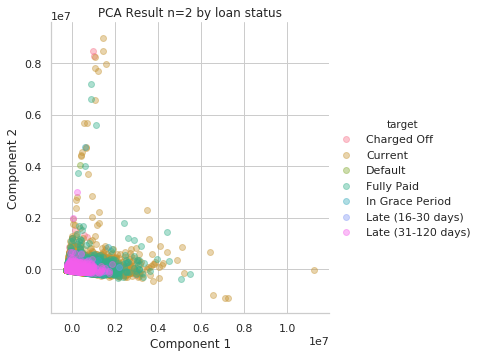

In [154]:
#graph output of PCA
ax = sns.lmplot(x='x',
                y='y',
                hue='target',
                data=viz,
                scatter_kws={'alpha':.4},
                fit_reg=False)
plt.title('PCA Result n=2 by loan status')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [156]:
X = y2015.drop('loan_status',1) #data
X = pd.get_dummies(X) #add dummies for categorical variables
X = X.dropna(axis=1)

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)
cross_val_score(rfc,Y_sklearn,Y,cv=10)

array([0.64135262, 0.63957161, 0.6396666 , 0.64125763, 0.64029922,
       0.64029922, 0.64086062, 0.64095562, 0.63970361, 0.63983755])

In [168]:
#not much improvement. makes for a coool visualization
#take a small sample to not overload the kernel
test1 = y2015.head(750)
X3d = test1.drop('loan_status',1)
Y3d = test1['loan_status']
X3d = pd.get_dummies(X3d)
X3d = X3d.dropna(axis=1)


In [169]:
#fit reduced data and plot in 3d
sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X3d)

In [170]:
start = time.time()
x, y, z = Y_sklearn[:,0], Y_sklearn[:,1], Y_sklearn[:,2]


trace1 = go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=4,
        color=viz.tcode,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='pca1')
stop = time.time()
times = (stop-start)/60
print(times)

0.02808154821395874


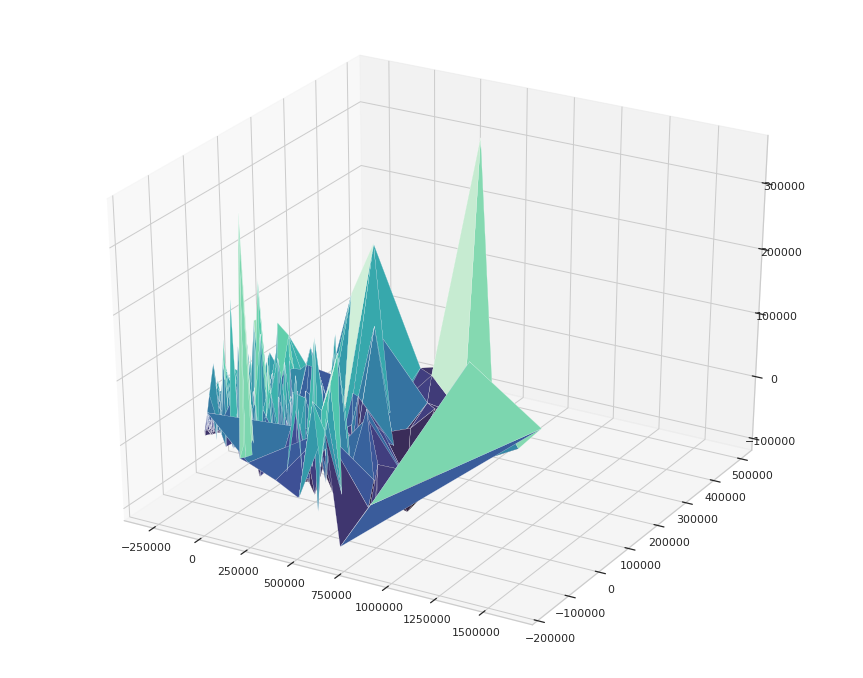

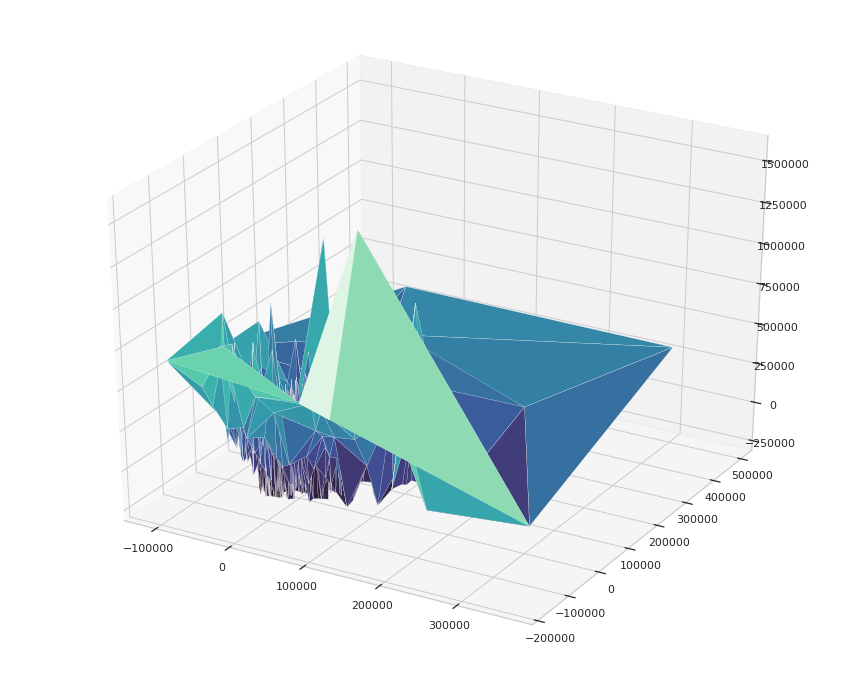

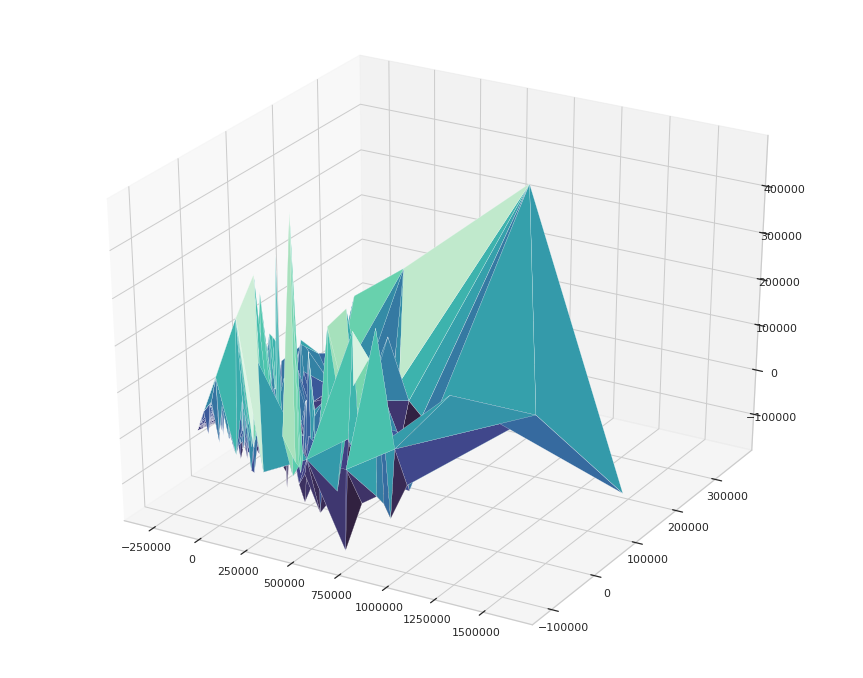

In [178]:


#plot the surface as component 3
fig = plt.figure(figsize=(15,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(Y_sklearn[:,0], Y_sklearn[:,1], Y_sklearn[:,2], cmap='mako', linewidth=0.2)
plt.show()
fig = plt.figure(figsize=(15,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(Y_sklearn[:,2], Y_sklearn[:,1], Y_sklearn[:,0], cmap='mako', linewidth=0.2)
plt.show() 
fig = plt.figure(figsize=(15,12))
ax = fig.gca(projection='3d')
ax.plot_trisurf(Y_sklearn[:,0], Y_sklearn[:,2], Y_sklearn[:,1], cmap='mako', linewidth=0.2)
plt.show()

In [179]:
#Back to PCA
X = y2015.drop('loan_status',1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

(421095, 75)

In [180]:
comp = []
scores = []
times = []
for i in range(4,15):
    start = time.time()
    X = y2015.drop('loan_status',1)#include for time calculation
    Y = y2015['loan_status']
    X = pd.get_dummies(X)
    X = X.dropna(axis=1)
    sklearn_pca = PCA(n_components=i)
    Y_sklearn = sklearn_pca.fit_transform(X)
    score_rfc = cross_val_score(rfc,Y_sklearn,Y,cv=10)
    scores.append(score_rfc.mean())
    comp.append(i)
    stop = time.time()
    ctime = stop-start
    times.append(ctime)


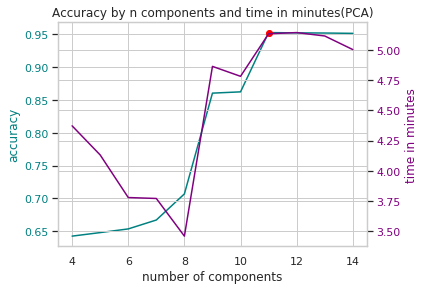

Maximum accuracy 0.9528, components = 11.00


In [181]:
x = np.array(comp)
y0 = np.array(scores)
y1 = np.array([x/60 for x in times])
n_max = y0.argmax()
point = [x[n_max],y0.max()]

fig, ax1 = plt.subplots()
fig.figsize=(15,12)

ax1.set_xlabel('number of components')
ax1.set_ylabel('accuracy', color='teal')
ax1.plot(x,y0 , color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
plt.plot(point[0],point[1],'o',color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'purple'
ax2.set_ylabel('time in minutes', color=color) 
ax2.plot(x, y1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Accuracy by n components and time in minutes(PCA)')
plt.show()
print('Maximum accuracy {0:.4f}, components = {1:.2f}'.format(y0.max(),x[n_max]))

In [182]:
corrmat = y2015.corr().abs()
print(corrmat.shape)
c = corrmat.unstack().reset_index()

(68, 68)


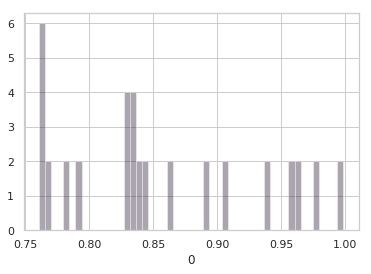

level_0                         level_1         0
600                         open_acc                        num_sats  0.998602
3816                        num_sats                        open_acc  0.998602
4376                 tot_hi_cred_lim                     tot_cur_bal  0.974943
1696                     tot_cur_bal                 tot_hi_cred_lim  0.974943
898                      total_pymnt                 total_rec_prncp  0.964876
965                  total_rec_prncp                     total_pymnt  0.964876
4586      total_il_high_credit_limit                    total_bal_il  0.958632
2107                    total_bal_il      total_il_high_credit_limit  0.958632
2                          loan_amnt                     installment  0.941205
136                      installment                       loan_amnt  0.941205
4450               total_bal_ex_mort                    total_bal_il  0.904226
2105                    total_bal_il               total_bal_ex_mort  0.904226
3380  mths_since_recent_revol_delinq        mths_since_recent_bc_dlq  0.891783
3313        mths_since_recent_bc_dlq  mths_since_recent_revol_delinq  0.891783
4487               total_bal_ex_mort      total_il_high_credit_limit  0.864517
4621      total_il_high_credit_limit               total_bal_ex_mort  0.864517
2753            acc_open_past_24mths                     open_rv_24m  0.842395
2284                     open_rv_24m            acc_open_past_24mths  0.842395
3792                   num_rev_accts                       num_bc_tl  0.839283
3591                       num_bc_tl                   num_rev_accts  0.839283
2458                total_rev_hi_lim                       revol_bal  0.833423
716                        revol_bal                total_rev_hi_lim  0.833423
2236                     open_rv_12m              num_tl_op_past_12m  0.832778
4112              num_tl_op_past_12m                     open_rv_12m  0.832778
598                         open_acc                   num_op_rev_tl  0.829359
3680                   num_op_rev_tl                        open_acc  0.829359
3728                   num_op_rev_tl                        num_sats  0.828263
3862                        num_sats                   num_op_rev_tl  0.828263
3966                    num_tl_30dpd                  acc_now_delinq  0.793368
1554                  acc_now_delinq                    num_tl_30dpd  0.793368
3727                   num_op_rev_tl                   num_rev_accts  0.781827
3794                   num_rev_accts                   num_op_rev_tl  0.781827
2276                     open_rv_24m                     open_rv_12m  0.767262
2209                     open_rv_12m                     open_rv_24m  0.767262
4120              num_tl_op_past_12m            acc_open_past_24mths  0.762607
2780            acc_open_past_24mths              num_tl_op_past_12m  0.762607
3751                   num_rev_accts                       total_acc  0.761672
803                        total_acc                   num_rev_accts  0.761672
1864                     open_il_12m                     open_il_24m  0.760552
1931                     open_il_24m                     open_il_12m  0.760552

In [183]:
#take a look at the distribution of the higher correlated pairs.
c = c.loc[(c[0]!=1)&(c[0]>.75)]
#plot a histogram
fig = sns.distplot(c[0],kde=False,bins=50)
plt.show()
c.sort_values(by=0,ascending=False)

As you can see there are a lot of pairs of variables thats highly correlated with one another also correlated by association, for example, 'installment' is correlated with 'loan amount' and 'total payment'. total payment is correlated with total interest rec. etc...These variables can all be combined with one another with little information loss. First we need to decide which variable to combine.